### 1. Importing packages

In [1]:
!pip install textblob
%matplotlib inline

In [2]:
# text data preprocessing
import pandas as pd
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords, wordnet
from nltk import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
import warnings
warnings.filterwarnings(action='ignore')
from textblob import TextBlob

# text data visualization
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### 2. Loading dataset

In [25]:
# tweets about TSLA from 1/1/2018 to 1/12/2020
tweets_df = pd.read_csv('./tesla_2018_to_2020.csv').drop(['Unnamed: 0'], axis=1)
tweets_df.head()

,created_at,id_str,conversation_id_str,full_text,lang,favorited,retweeted,retweet_count,favorite_count,reply_count,...,user_id_str,user_name,user_full_name,user_verified,in_reply_to_status_id_str,in_reply_to_user_id_str,hashtags,mentions,urls,media
0,2020-06-01T22:59:51+00:00,1267591722126598144,1267591722126598144,I just got hired at Tesla! God is good.,en,False,False,0,19,5,...,247611935,J0rdan0re0,Jordy,False,NaN,NaN,NaN,NaN,NaN,[]
1,2020-06-01T22:59:49+00:00,1267591711905026048,1267591711905026048,tesla [mergrim mix] (Remastered 2020) - Spangl...,en,False,False,0,0,0,...,160589441,pranasoddm,ますだんでぃー,False,NaN,NaN,#nowplaying,NaN,NaN,"[{""url"": ""https://pbs.twimg.com/media/EZdj8TtV..."
2,2020-06-01T22:58:40+00:00,1267591424628973574,1267591424628973574,Tesla - Little Suzi https://t.co/9Lj4jvF8KR vi...,en,False,False,0,0,0,...,578148290,RetroMusicVideo,Retro Music Videos,False,NaN,NaN,NaN,YouTube,https://t.co/9Lj4jvF8KR,[]
3,2020-06-01T22:58:21+00:00,1267591344299683841,1267591344299683841,"New post: ""Why Has Tesla Halved The Model Y De...",en,False,False,0,0,0,...,1009977973942964226,blackarcintel,BlackArc Intel,False,NaN,NaN,NaN,NaN,https://t.co/6tuA2dVcLf,[]
4,2020-06-01T22:57:35+00:00,1267591151487418372,1267591151487418372,Meaning if you had a million units of Tesla yo...,en,False,False,0,0,1,...,830407971565867008,RusticMahn,REDorDEAD!,False,NaN,NaN,NaN,NaN,NaN,[]


In [26]:
# converting date column into datetime type
tweets_df['created_at'] = pd.to_datetime(tweets_df['created_at']).dt.date

### 3. Cleaning tweets

In [27]:
def clean(df):
    # adding whitespace to end of every tweet
    df['cleaned_tweet'] = df.full_text.map(lambda x: x + ' ')
    # removing http links
    df.cleaned_tweet = df.cleaned_tweet.map(lambda x: re.sub(r'http.*', '', x))
    # removing special characters and numbers
    df.cleaned_tweet = df.cleaned_tweet.map(lambda x: re.sub(r'[^a-zA-Z#]', ' ', x))
    # lowercasing tweets
    df.cleaned_tweet = df.cleaned_tweet.map(lambda x: x.lower())
    # tokenizing tweets and removing stop words (words which don't add much meaning to sentence)
    stopword_list = stopwords.words('english')
    for i in range(len(df.cleaned_tweet)):
        tokens = word_tokenize(df.cleaned_tweet[i])
        clean_tokens = [w for w in tokens if w not in stopword_list]
        df.cleaned_tweet[i] = clean_tokens

In [28]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [29]:
clean(tweets_df)
tweets_df.head()

,created_at,id_str,conversation_id_str,full_text,lang,favorited,retweeted,retweet_count,favorite_count,reply_count,...,user_name,user_full_name,user_verified,in_reply_to_status_id_str,in_reply_to_user_id_str,hashtags,mentions,urls,media,cleaned_tweet
0,2020-06-01,1267591722126598144,1267591722126598144,I just got hired at Tesla! God is good.,en,False,False,0,19,5,...,J0rdan0re0,Jordy,False,NaN,NaN,NaN,NaN,NaN,[],"[got, hired, tesla, god, good]"
1,2020-06-01,1267591711905026048,1267591711905026048,tesla [mergrim mix] (Remastered 2020) - Spangl...,en,False,False,0,0,0,...,pranasoddm,ますだんでぃー,False,NaN,NaN,#nowplaying,NaN,NaN,"[{""url"": ""https://pbs.twimg.com/media/EZdj8TtV...","[tesla, mergrim, mix, remastered, spangle, cal..."
2,2020-06-01,1267591424628973574,1267591424628973574,Tesla - Little Suzi https://t.co/9Lj4jvF8KR vi...,en,False,False,0,0,0,...,RetroMusicVideo,Retro Music Videos,False,NaN,NaN,NaN,YouTube,https://t.co/9Lj4jvF8KR,[],"[tesla, little, suzi]"
3,2020-06-01,1267591344299683841,1267591344299683841,"New post: ""Why Has Tesla Halved The Model Y De...",en,False,False,0,0,0,...,blackarcintel,BlackArc Intel,False,NaN,NaN,NaN,NaN,https://t.co/6tuA2dVcLf,[],"[new, post, tesla, halved, model, delivery, ti..."
4,2020-06-01,1267591151487418372,1267591151487418372,Meaning if you had a million units of Tesla yo...,en,False,False,0,0,1,...,RusticMahn,REDorDEAD!,False,NaN,NaN,NaN,NaN,NaN,[],"[meaning, million, units, tesla, made, cool, b..."


In [30]:
tweets_df.full_text[0]

'I just got hired at Tesla! God is good.'

In [31]:
tweets_df.cleaned_tweet[0]

['got', 'hired', 'tesla', 'god', 'good']

### 4. Lemmatizing cleaned tweets

In [32]:
# lemmatization: grouping together inflected forms of word, e.g. watched -> watch
def lemmatize(tweets):
    for i in range(len(tweets)):
        # pos-tagging each word in tweet
        for w in [tweets[i]]:
            pos_tag_list = nltk.pos_tag(w)
        # converting pos-tag to be wordnet compliant
        wordnet_tags = []
        for j in pos_tag_list:
            # adjective
            if j[1].startswith('J'):
                wordnet_tags.append(wordnet.ADJ)
            # noun
            elif j[1].startswith('N'):
                wordnet_tags.append(wordnet.NOUN)
            # adverb
            elif j[1].startswith('R'):
                wordnet_tags.append(wordnet.ADV)
            # verb
            elif j[1].startswith('V'):
                wordnet_tags.append(wordnet.VERB)
            # default to noun
            else:
                wordnet_tags.append(wordnet.NOUN)
        # lemmatizing each word in tweet
        lem_words = []
        for k in range(len(tweets[i])):
            lem_words.append(lemmatizer.lemmatize(tweets[i][k], pos=wordnet_tags[k]))
        lem_tweet = ' '.join(lem_words)
        tweets[i] = lem_tweet

In [33]:
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [34]:
lemmatize(tweets_df.cleaned_tweet)
tweets_df.head()

,created_at,id_str,conversation_id_str,full_text,lang,favorited,retweeted,retweet_count,favorite_count,reply_count,...,user_name,user_full_name,user_verified,in_reply_to_status_id_str,in_reply_to_user_id_str,hashtags,mentions,urls,media,cleaned_tweet
0,2020-06-01,1267591722126598144,1267591722126598144,I just got hired at Tesla! God is good.,en,False,False,0,19,5,...,J0rdan0re0,Jordy,False,NaN,NaN,NaN,NaN,NaN,[],get hire tesla god good
1,2020-06-01,1267591711905026048,1267591711905026048,tesla [mergrim mix] (Remastered 2020) - Spangl...,en,False,False,0,0,0,...,pranasoddm,ますだんでぃー,False,NaN,NaN,#nowplaying,NaN,NaN,"[{""url"": ""https://pbs.twimg.com/media/EZdj8TtV...",tesla mergrim mix remastered spangle call lill...
2,2020-06-01,1267591424628973574,1267591424628973574,Tesla - Little Suzi https://t.co/9Lj4jvF8KR vi...,en,False,False,0,0,0,...,RetroMusicVideo,Retro Music Videos,False,NaN,NaN,NaN,YouTube,https://t.co/9Lj4jvF8KR,[],tesla little suzi
3,2020-06-01,1267591344299683841,1267591344299683841,"New post: ""Why Has Tesla Halved The Model Y De...",en,False,False,0,0,0,...,blackarcintel,BlackArc Intel,False,NaN,NaN,NaN,NaN,https://t.co/6tuA2dVcLf,[],new post tesla halve model delivery timeline
4,2020-06-01,1267591151487418372,1267591151487418372,Meaning if you had a million units of Tesla yo...,en,False,False,0,0,1,...,RusticMahn,REDorDEAD!,False,NaN,NaN,NaN,NaN,NaN,[],mean million unit tesla make cool buck today a...


In [35]:
# removing 'tesla, 'tsla', 'q', 'elon', 'musk', 'elonmusk' and '#'
def final_clean(df):
    df.cleaned_tweet = df.cleaned_tweet.map(lambda x: x.replace('tesla', ''))
    df.cleaned_tweet = df.cleaned_tweet.map(lambda x: x.replace('tsla', ''))
    df.cleaned_tweet = df.cleaned_tweet.map(lambda x: x.replace('q', ''))
    df.cleaned_tweet = df.cleaned_tweet.map(lambda x: x.replace('#', ''))
    df.cleaned_tweet = df.cleaned_tweet.map(lambda x: x.replace('musk', ''))
    df.cleaned_tweet = df.cleaned_tweet.map(lambda x: x.replace('elon', ''))
    df.cleaned_tweet = df.cleaned_tweet.map(lambda x: x.replace('elonmusk', ''))
final_clean(tweets_df)

In [36]:
tweets_df.cleaned_tweet[0]

'get hire  god good'

In [37]:
# joining all tweets into single string
all_words_str = ' '.join([tweet for tweet in tweets_df.cleaned_tweet])

# making list of all words
all_words_list = all_words_str.split()

### 5. Frequency analysis

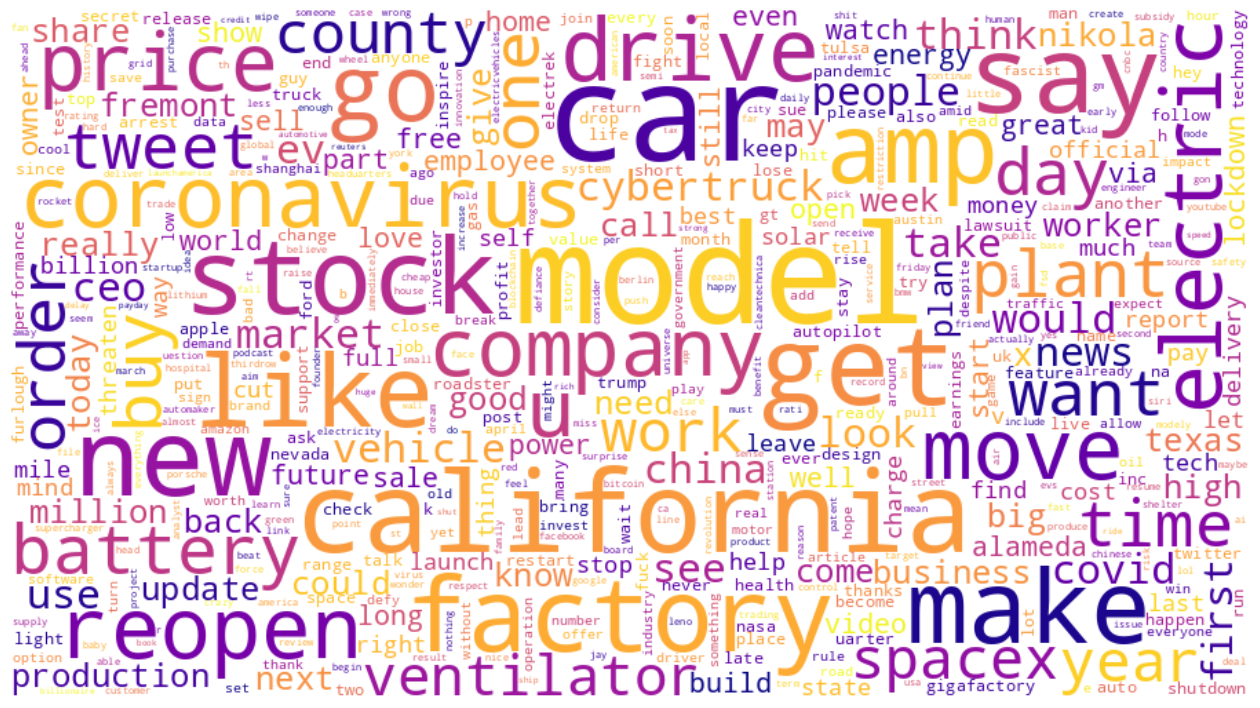

In [38]:
word_freq = nltk.FreqDist(all_words_list)
# word cloud with word frequencies
word_cloud = WordCloud(
    width=900,
    height=500,
    max_words=500,
    max_font_size=100,
    relative_scaling=0.5,
    colormap='plasma',
    background_color='white',
    normalize_plurals=True
).generate_from_frequencies(word_freq)

# Mostrar la WordCloud
plt.figure(figsize=(16, 9))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [39]:
# showing frequency of each word
word_freq_df = pd.DataFrame({'Word': list(word_freq.keys()), 'Count': list(word_freq.values())}).sort_values(by=['Count'], ascending=False)
word_freq_df.head(10)

,Word,Count
19,model,26128
237,car,25033
82,california,17028
0,get,16389
16,new,15903
156,say,15450
34,stock,14754
158,factory,14070
25,make,13929
188,like,13594


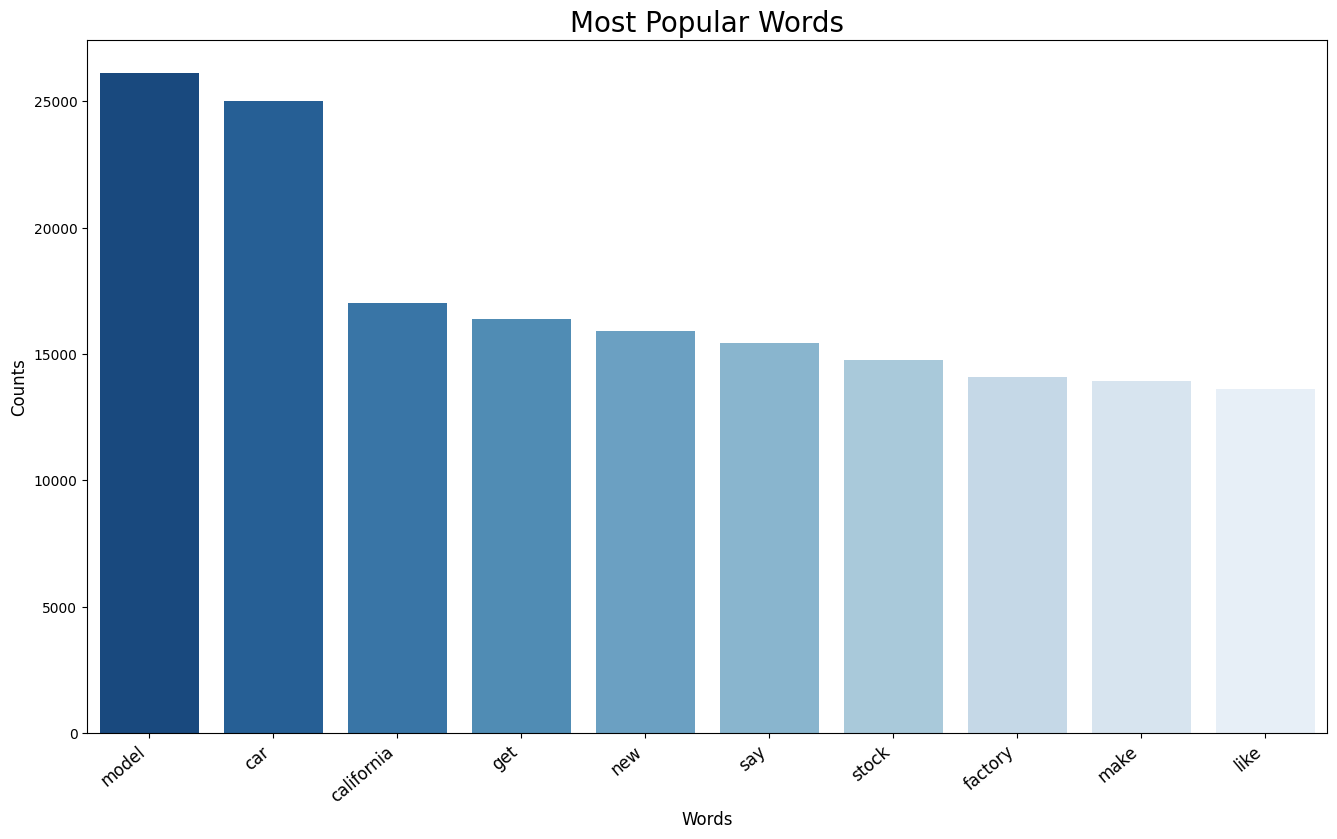

In [40]:
word_freq_df = word_freq_df.nlargest(columns='Count', n=10)

# plotting bar plot of most frequent words
plt.figure(figsize=(16, 9))
colors = sns.color_palette("Blues", len(word_freq_df)) [::-1]
ax = sns.barplot(data=word_freq_df, x='Word', y='Count', palette=colors)
ax.set_ylabel('Counts', fontsize=12)
ax.set_xlabel('Words', fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right', fontsize=12)
ax.set_title('Most Popular Words', fontsize=20)
plt.show()

### 6. Save cleaned tweets

In [41]:
tweets_df.to_csv('cleaned_tesla_2018_to_2020.csv', index=False)

### 7. Loading new dataset

In [42]:
tweets_df = pd.read_csv('cleaned_tesla_2018_to_2020.csv', lineterminator='\n')
tweets_df = tweets_df.iloc[:, [1, 0, 24]]
tweets_df.head()

,id_str,created_at,cleaned_tweet
0,1267591722126598144,2020-06-01,get hire god good
1,1267591711905026048,2020-06-01,mergrim mix remastered spangle call lilli lin...
2,1267591424628973574,2020-06-01,little suzi
3,1267591344299683841,2020-06-01,new post halve model delivery timeline
4,1267591151487418372,2020-06-01,mean million unit make cool buck today alone ...


In [43]:
# converting date column into datetime type
tweets_df.created_at = pd.to_datetime(tweets_df.created_at)
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235613 entries, 0 to 235612
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   id_str         235613 non-null  int64         
 1   created_at     235613 non-null  datetime64[ns]
 2   cleaned_tweet  234717 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 5.4+ MB


In [44]:
# checking for null values
tweets_df.isnull().sum()

,0
id_str,0
created_at,0
cleaned_tweet,896


In [45]:
# dropping null values
tweets_df = tweets_df.dropna()

### 8. Calculating sentiment scores

In [46]:
# using TextBlob to get sentiment scores
tweets_df['sentiment_score'] = tweets_df.apply(lambda row: TextBlob(row.cleaned_tweet).sentiment[0], axis=1)
tweets_df.head()

,id_str,created_at,cleaned_tweet,sentiment_score
0,1267591722126598144,2020-06-01,get hire god good,0.700000
1,1267591711905026048,2020-06-01,mergrim mix remastered spangle call lilli lin...,0.000000
2,1267591424628973574,2020-06-01,little suzi,-0.187500
3,1267591344299683841,2020-06-01,new post halve model delivery timeline,0.136364
4,1267591151487418372,2020-06-01,mean million unit make cool buck today alone ...,0.018750


In [47]:
# previewing how sentiment scores differ in different tweets
pd.options.display.max_colwidth = 300
random_subset = tweets_df.sample(n=10)
random_subset = random_subset.drop(columns=['id_str', 'created_at'])
random_subset = random_subset.rename(columns={'tweet': 'Original Tweet',
                                              'cleaned_tweet': 'Cleaned Tweet',
                                              'sentiment_score':'Sentiment Score'})
random_subset.head(10)

,Cleaned Tweet,Sentiment Score
131417,tweet wipe bn value,0.000000
25582,lyndsay tucker year old skin care consultant san jose ca activate cell phone receive old number amp use bg founder get many interest call text,0.233333
23040,play walk away classic rock,0.166667
200585,start sell two new locally make model variant china,0.068182
147663,share jump post surprise profit,0.000000
132880,hold together another year electrification momentum dependent super rich legend get ta say tweet crazy mean bigoted thing,-0.051042
178115,th october big car manufacturer world fsd achieve decade ago rus mitchell finish another article send fake ventilator hospital,-0.250000
124257,ppl piss financial expert anti scammer journalist employee ex employee nano scientist cartoonist saudis panasonic supplier institute investor car owner blue check tweeter retail investor shill phils fred lambert astronomer,0.000000
158373,affect china roll back subsidy analyst say,0.000000
233825,british motor oil youlikecarsuk automotiveasset carkeys uk screamingcars gandalfwasme avc lease ja auto admarkuk zdravkost rafredarrows realdonaldtrump runnerservice bgmotogp formulaoneworld crienaldavies imperialcar hpi bmw,0.000000


### 9. Frequency analysis

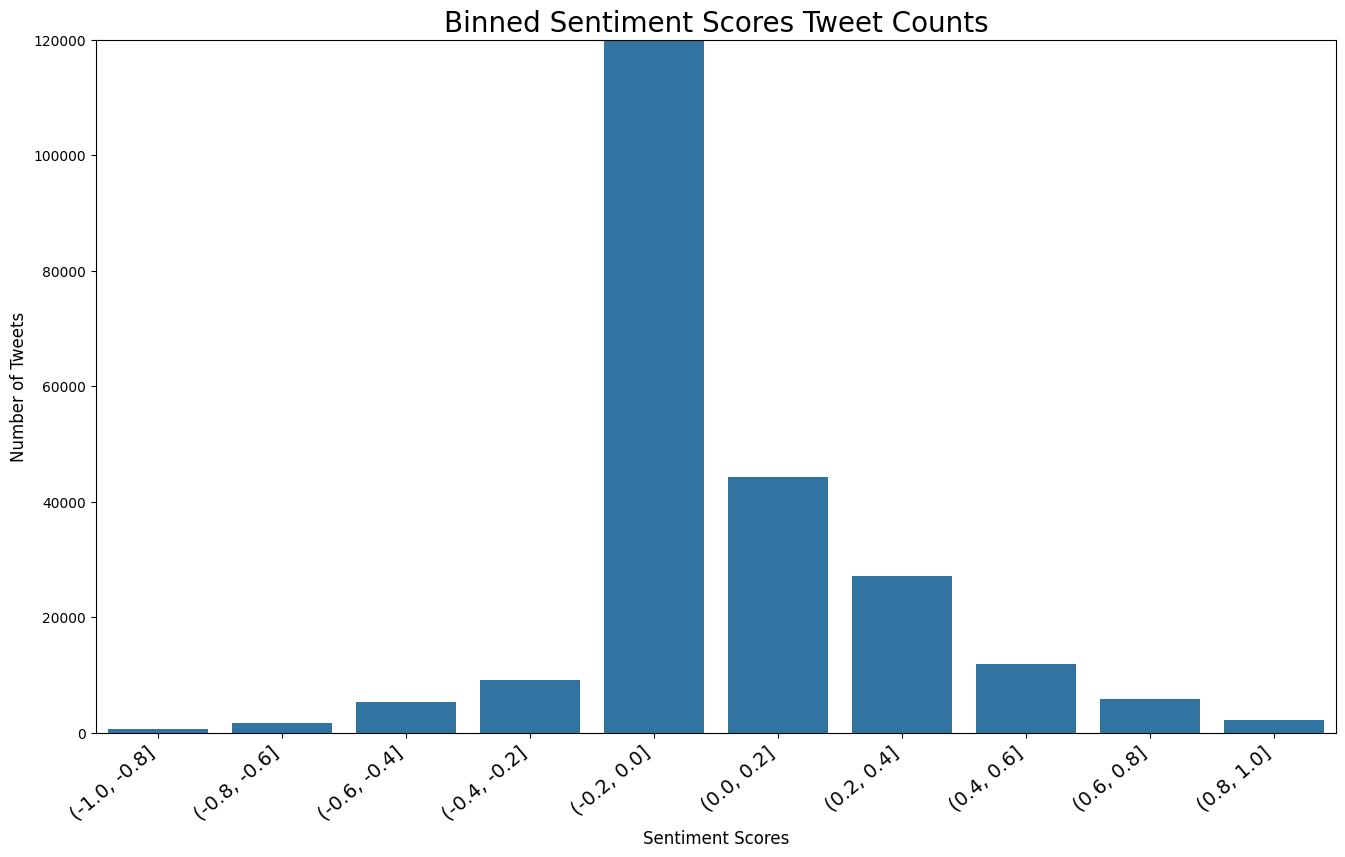

In [48]:
# plotting counts of tweets for binned sentiment scores
bins = [-1.0, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1]
tweets_df['bin'] = pd.cut(tweets_df['sentiment_score'], bins)
plt.figure(figsize=(16,9))
ax = sns.countplot(x=tweets_df['bin'])
ax.set_ylabel('Number of Tweets', fontsize=12)
ax.set_xlabel('Sentiment Scores', fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right', fontsize=14)
ax.set_title('Binned Sentiment Scores Tweet Counts', fontsize=20)
ax.set_ylim(0, 120000)
plt.show()

### 10. Calculating daily average sentiment scores

In [49]:
daily_sentiment_scores_df = tweets_df[['created_at', 'sentiment_score']]
daily_sentiment_scores_df.head()

,created_at,sentiment_score
0,2020-06-01,0.700000
1,2020-06-01,0.000000
2,2020-06-01,-0.187500
3,2020-06-01,0.136364
4,2020-06-01,0.018750


In [50]:
# daily average sentiment scores
daily_sentiment_scores_df = daily_sentiment_scores_df.resample('D', on='created_at').mean()
daily_sentiment_scores_df.head()

,sentiment_score
created_at,
2020-03-29,0.098616
2020-03-30,0.098205
2020-03-31,0.105970
2020-04-01,0.108210
2020-04-02,0.103616


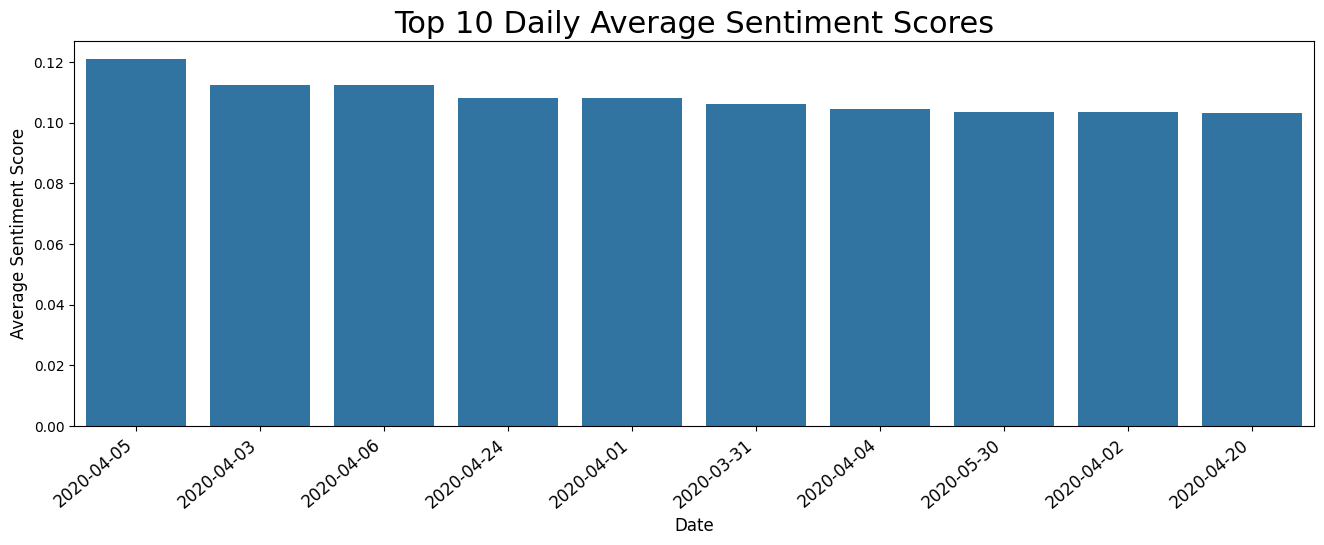

In [51]:
# plotting top 10 daily average sentiment scores
top_avg_df = daily_sentiment_scores_df.nlargest(columns='sentiment_score', n=10)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=top_avg_df, x=top_avg_df.index.date, y=top_avg_df['sentiment_score'])
ax.set_ylabel('Average Sentiment Score', fontsize=12)
ax.set_xlabel('Date', fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right', fontsize=12)
ax.set_title('Top 10 Daily Average Sentiment Scores', fontsize=22)
plt.show()

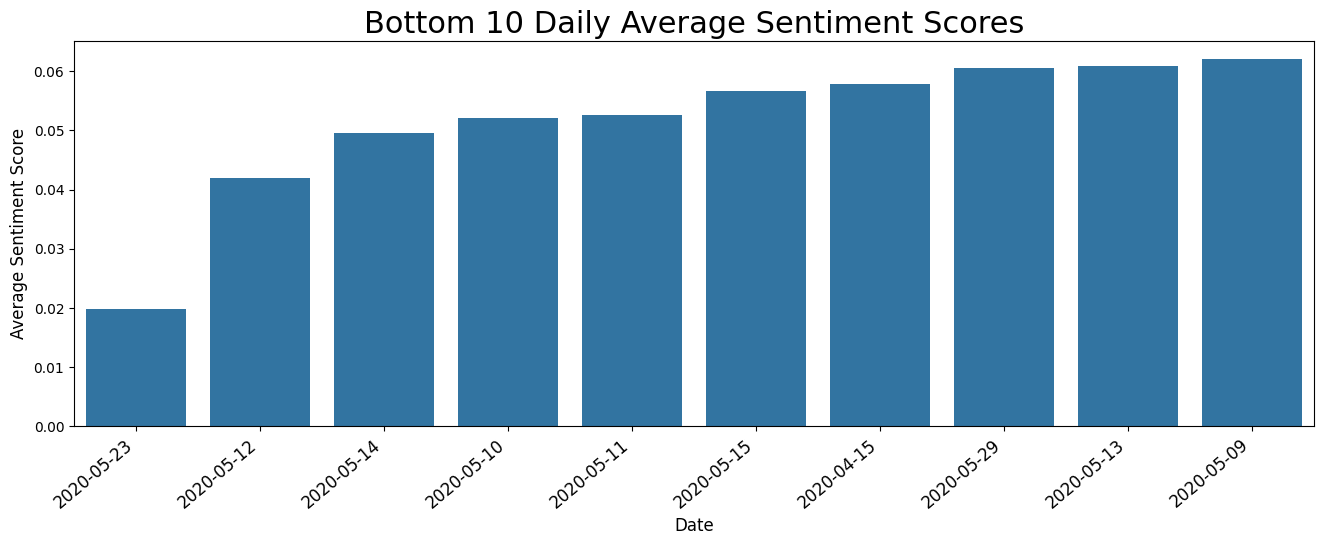

In [52]:
# plotting bottom 10 daily average sentiment scores
bottom_avg_df = daily_sentiment_scores_df.nsmallest(columns='sentiment_score', n=10)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=bottom_avg_df, x=bottom_avg_df.index.date, y=bottom_avg_df['sentiment_score'])
ax.set_ylabel('Average Sentiment Score', fontsize=12)
ax.set_xlabel('Date', fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right', fontsize=12)
ax.set_title('Bottom 10 Daily Average Sentiment Scores', fontsize=22)
plt.show()

### 11. Removing tweets with zero sentiment scores

In [53]:
tweets_df1 = tweets_df.copy()
tweets_df1.head()

,id_str,created_at,cleaned_tweet,sentiment_score,bin
0,1267591722126598144,2020-06-01,get hire god good,0.700000,"(0.6, 0.8]"
1,1267591711905026048,2020-06-01,mergrim mix remastered spangle call lilli line scll disc nowplaying,0.000000,"(-0.2, 0.0]"
2,1267591424628973574,2020-06-01,little suzi,-0.187500,"(-0.2, 0.0]"
3,1267591344299683841,2020-06-01,new post halve model delivery timeline,0.136364,"(0.0, 0.2]"
4,1267591151487418372,2020-06-01,mean million unit make cool buck today alone prediction hit end june,0.018750,"(0.0, 0.2]"


In [54]:
tweets_df1.created_at = pd.to_datetime(tweets_df1.created_at)
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 234717 entries, 0 to 235612
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   id_str           234717 non-null  int64         
 1   created_at       234717 non-null  datetime64[ns]
 2   cleaned_tweet    234717 non-null  object        
 3   sentiment_score  234717 non-null  float64       
 4   bin              234448 non-null  category      
dtypes: category(1), datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 9.2+ MB


In [55]:
# checking tweets with zero sentiment scores
(tweets_df1.sentiment_score == 0).sum()

108010

In [56]:
# removing tweets with zero sentiment scores
tweets_df1 = tweets_df1[tweets_df1.sentiment_score !=0 ]
(tweets_df1.sentiment_score == 0).sum()

0

In [57]:
# daily average sentiment scores without zero sentiment scores
numeric_columns = tweets_df1.select_dtypes(include=['number']).columns

tweets_df1 = tweets_df1.groupby('created_at', as_index=False)[numeric_columns].mean()

In [58]:
# checking for null values
tweets_df1.isnull().sum()

,0
created_at,0
id_str,0
sentiment_score,0


In [59]:
# adding final average sentiment scores
daily_sentiment_scores_df['sentiment_score_final'] = tweets_df1.sentiment_score.values
daily_sentiment_scores_df.head()

,sentiment_score,sentiment_score_final
created_at,,
2020-03-29,0.098616,0.165219
2020-03-30,0.098205,0.163836
2020-03-31,0.105970,0.183886
2020-04-01,0.108210,0.177022
2020-04-02,0.103616,0.185807


In [60]:
daily_sentiment_scores_df.to_csv('daily-avg-sentiment-scores.csv')